## Clustering the images using k-means

In [23]:
filename = 'result-wse_flickr.jsonl'
filepath = '../tasks/03.image-crawl'

import os

filename = os.path.join(filepath, filename)
print filename

print os.path.exists(filename)

../tasks/03.image-crawl/result-wse_flickr.jsonl
True


In [143]:
# load the data
# only get the data for query='bench'

lines = open(filename).readlines()
print len(lines)

import json
items = [json.loads(line) for line in lines]
items = filter(lambda item: item.get('embeds') and item.get('query') == 'bird', items)
print len(items)

print items[0].keys()


17224
687
[u'flickr_title', u'flickr_desc', u'flickr_pageurl', u'query', u'ref_urls', u'probs', u'flickr_username', u'title', u'flickr_realname', u'flickr_date_taken', u'flickr_date_posted', u'flickr_tags', u'tags', u'embeds', u'image_urls', u'qrank', u'flickr_location', u'flickr_comments', u'url', u'flickr_license', u'flickr_userid', u'crawler']


In [144]:
urls = [item['url'] for item in items]
features = [item['embeds'] for item in items]

print len(urls)
print len(features)

print urls[0]
print "dimension", len(features[0])
#print features[0]

687
687
http://farm1.static.flickr.com/613/23349661371_d531cff170_z.jpg
dimension 1024


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#digits = load_digits()
#data = scale(digits.data)


In [146]:
# convert data to nparray
data = scale(np.array(features))


In [147]:
data.shape

labels = np.array(urls)
print labels.shape


(687,)


In [148]:
data.shape

n_samples, n_features = data.shape
k = 3

k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
k_means.fit(data)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [149]:
print(k_means.labels_[:100])


[1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1]


In [150]:
clustered_urls = [[], [], []]

print clustered_urls

it = np.nditer(k_means.labels_, flags=['f_index'])

while not it.finished:
    #print it.index, it[0], urls[it.index]
    clustered_urls[it[0]].append(urls[it.index])
    #print clustered_urls
    it.iternext()

for idx in range(k):
    print 'count for %d: %d' % (idx, len(clustered_urls[idx]))

print clustered_urls[0][:10]
print
print clustered_urls[1][:10]


[[], [], []]
count for 0: 299
count for 1: 353
count for 2: 35
[u'http://farm1.static.flickr.com/685/23349084581_d1a32b453f_z.jpg', u'http://farm1.static.flickr.com/590/23135885960_08af805fb4_z.jpg', u'http://farm1.static.flickr.com/709/22804459763_d88b3dbcb7_z.jpg', u'http://farm1.static.flickr.com/585/23349114221_eac959110a_z.jpg', u'http://farm1.static.flickr.com/762/22803281004_2fb72b0cbf_z.jpg', u'http://farm1.static.flickr.com/592/23405466806_ceb1f3f734_z.jpg', u'http://farm1.static.flickr.com/587/22804497713_331aebb5f9_z.jpg', u'http://farm1.static.flickr.com/686/23349127221_0966ccf4b5_z.jpg', u'http://farm6.static.flickr.com/5666/23431672935_5bacee10af_z.jpg', u'http://farm1.static.flickr.com/752/23431653535_0288f14573_z.jpg']

[u'http://farm1.static.flickr.com/613/23349661371_d531cff170_z.jpg', u'http://farm6.static.flickr.com/5784/23063656409_bb73fb4bfe_z.jpg', u'http://farm6.static.flickr.com/5813/23431624365_970b4ace69_z.jpg', u'http://farm1.static.flickr.com/628/2306365677

sss


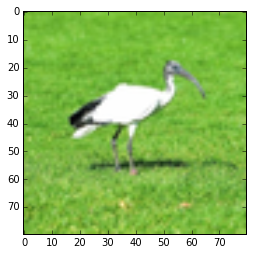

In [152]:
# plot the top images in each cluster

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image
import requests
import StringIO

img_io = requests.get(clustered_urls[0][:10][0])
img = Image.open(StringIO.StringIO(img_io.content))
resized = img.thumbnail((80, 80), Image.ANTIALIAS)
print 'sss'
plt.imshow(img)
plt.show()

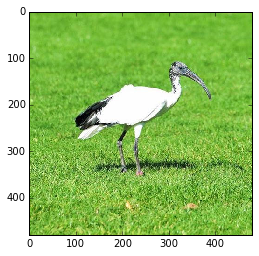

/Users/robert/virtualenv/v1/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warnings.warn("Low image dynamic range; displaying image with "


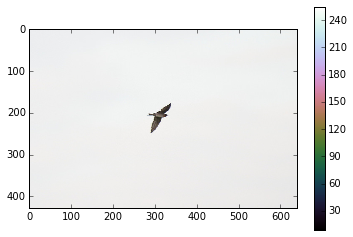

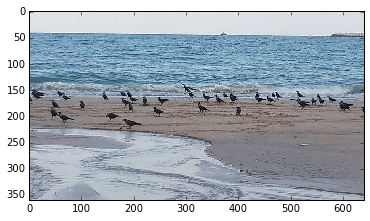

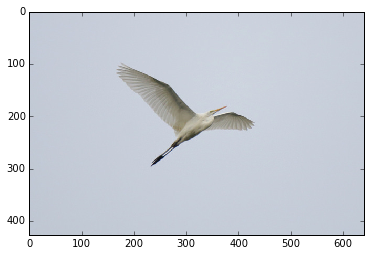

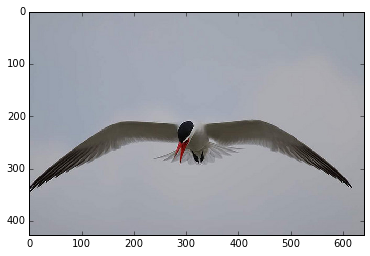

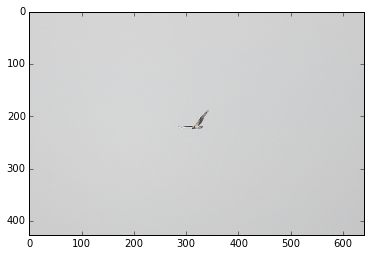

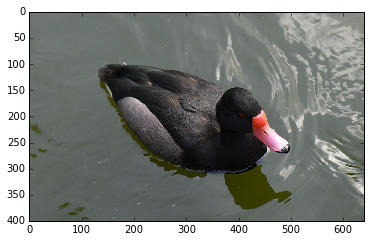

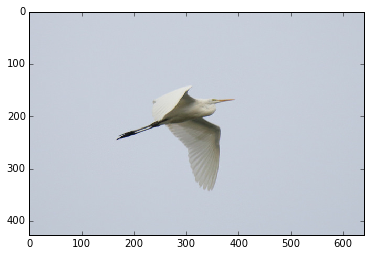

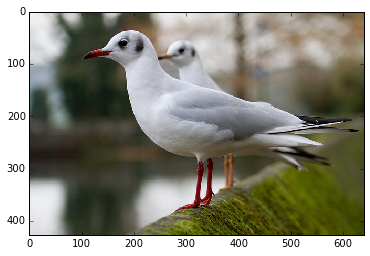

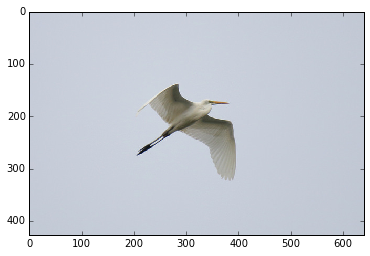

-----------------------


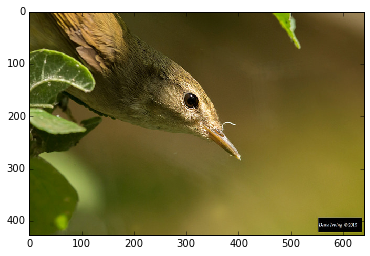

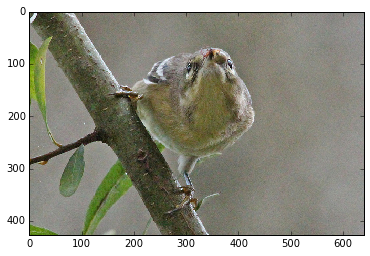

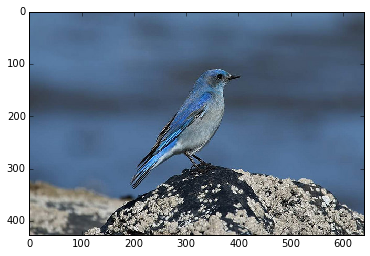

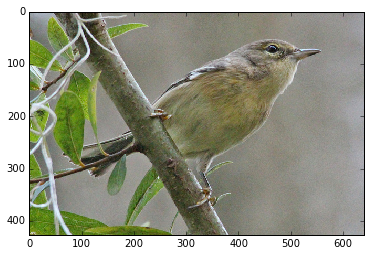

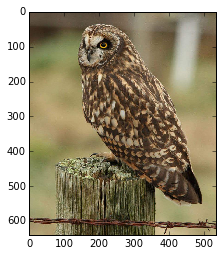

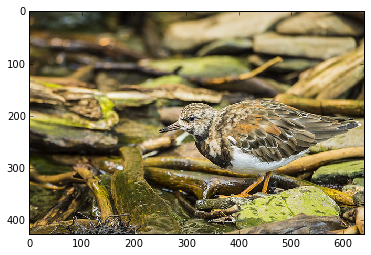

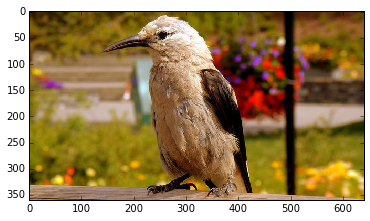

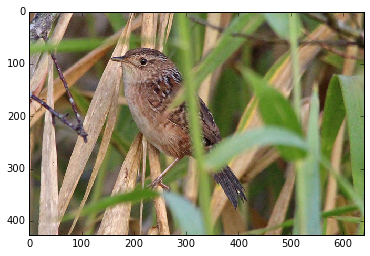

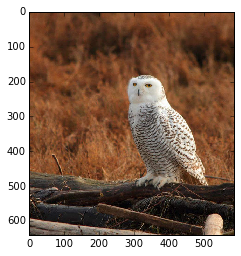

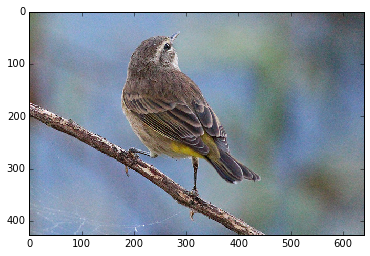

-----------------------


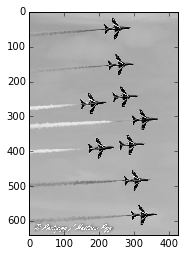

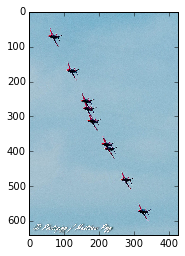

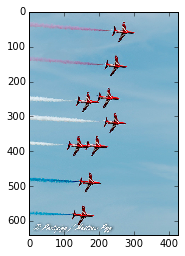

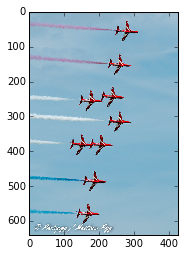

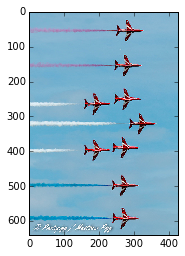

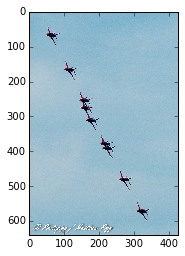

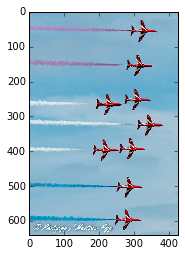

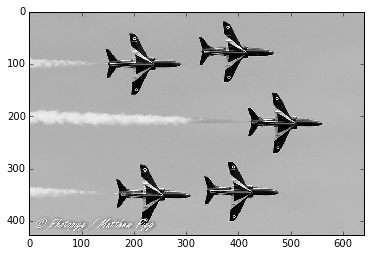

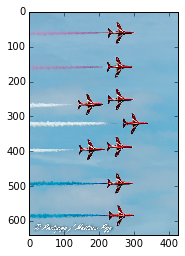

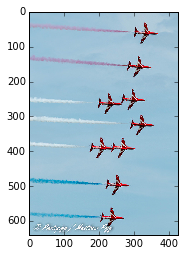

-----------------------


In [153]:
import skimage.io as io
%matplotlib inline

for cat in range(3):
    for idx in range(10):
        imgurl = clustered_urls[cat][idx]
        img_io = requests.get(imgurl)
        img = io.imread(StringIO.StringIO(img_io.content))

        io.imshow(img)
        io.show()
    print '-----------------------'